In [70]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


In [71]:
claims = pd.read_csv('Claims1.csv')

In [72]:
claims.head()


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,33985796,75740424,Crime,10-03-2018,Home,Unknown,Material only,2980.0,3.0,No
2,53522022,30308357,Other driver error,02-02-2018,Auto,No,Material only,3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No


In [73]:
claims.shape


(1100, 10)

In [74]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   float64
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 86.1+ KB


In [75]:
claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [76]:
claims['claim_amount'] = claims['claim_amount'].fillna(claims['claim_amount'].median())

In [77]:
claims['total_policy_claims'] = claims['total_policy_claims'].fillna(claims['total_policy_claims'].median())

In [78]:
claims.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
dtype: int64

In [79]:
claims.claim_date

0       11/27/2017
1       10-03-2018
2       02-02-2018
3       06/17/2018
4       01/13/2018
           ...    
1095    06-11-2017
1096    03/14/2018
1097    02-09-2018
1098    03/21/2018
1099    06-04-2017
Name: claim_date, Length: 1100, dtype: object

In [80]:
claims.claim_amount.min()

1000.0

In [81]:
claims.claim_amount.max()

48150.5

In [82]:
claims_binned = pd.Series(pd.cut(claims.claim_amount, range(0, 50000,10000)))

In [83]:
claims_binned

0           (0, 10000]
1           (0, 10000]
2           (0, 10000]
3           (0, 10000]
4           (0, 10000]
             ...      
1095        (0, 10000]
1096        (0, 10000]
1097    (20000, 30000]
1098    (20000, 30000]
1099    (30000, 40000]
Name: claim_amount, Length: 1100, dtype: category
Categories (4, interval[int64, right]): [(0, 10000] < (10000, 20000] < (20000, 30000] < (30000, 40000]]

In [84]:
claims['claims_binned'] = claims_binned

In [85]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,claims_binned
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]"
1,33985796,75740424,Crime,10-03-2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]"
2,53522022,30308357,Other driver error,02-02-2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]"
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]"
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]"


In [86]:
claims_1 = claims.copy()

In [87]:
claims_1['Claim_group'] = np.where(claims_1.claim_amount<=10000, "Very Low",
                                   np.where(claims_1.claim_amount<=20000, "Low",
                                            np.where(claims_1.claim_amount<=30000, "Medium",
                                                     np.where(claims_1.claim_amount<=40000, "High", "Very High"))))

In [88]:
claims_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,claims_binned,Claim_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]",Very Low
1,33985796,75740424,Crime,10-03-2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]",Very Low
2,53522022,30308357,Other driver error,02-02-2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]",Very Low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]",Very Low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]",Very Low


In [89]:
claims.total_policy_claims.min()

1.0

In [90]:
claims.total_policy_claims.max()

8.0

**Here we need to check the minimum and maximum values of claim_amount and total_policy_claims. So that we can convert these variables to categorical variable by binning.**

In [91]:
claims_1['total_policy_group'] = np.where(claims_1.total_policy_claims<=3, "Low",
                                   np.where(claims_1.total_policy_claims<=6, "Medium","high"))

In [92]:
claims_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,claims_binned,Claim_group,total_policy_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]",Very Low,Low
1,33985796,75740424,Crime,10-03-2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]",Very Low,Low
2,53522022,30308357,Other driver error,02-02-2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]",Very Low,Low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]",Very Low,Low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]",Very Low,Low


**Now we have converted the claim_amount and total_policy_claim datatype to categorical variables.**

In [93]:
claims_1 = claims_1.drop(columns = ['total_policy_claims','claim_amount'])

In [94]:
claims_1 = claims_1.drop(columns = ['claims_binned'])

In [95]:
claims_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,fraudulent,Claim_group,total_policy_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,No,Very Low,Low
1,33985796,75740424,Crime,10-03-2018,Home,Unknown,Material only,No,Very Low,Low
2,53522022,30308357,Other driver error,02-02-2018,Auto,No,Material only,Yes,Very Low,Low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,No,Very Low,Low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,No,Very Low,Low


In [96]:
claims_1 = claims_1.drop(columns = ['claim_date','customer_id','claim_id'])

In [97]:
claims_1.head()

,incident_cause,claim_area,police_report,claim_type,fraudulent,Claim_group,total_policy_group
0,Driver error,Auto,No,Material only,No,Very Low,Low
1,Crime,Home,Unknown,Material only,No,Very Low,Low
2,Other driver error,Auto,No,Material only,Yes,Very Low,Low
3,Natural causes,Auto,No,Material only,No,Very Low,Low
4,Crime,Auto,No,Material only,No,Very Low,Low


In [98]:
claims_1['fraudulent'] = np.where(claims['fraudulent'] == 'No',0,1)

In [99]:
claims_1.head()

,incident_cause,claim_area,police_report,claim_type,fraudulent,Claim_group,total_policy_group
0,Driver error,Auto,No,Material only,0,Very Low,Low
1,Crime,Home,Unknown,Material only,0,Very Low,Low
2,Other driver error,Auto,No,Material only,1,Very Low,Low
3,Natural causes,Auto,No,Material only,0,Very Low,Low
4,Crime,Auto,No,Material only,0,Very Low,Low


<Axes: xlabel='fraudulent'>

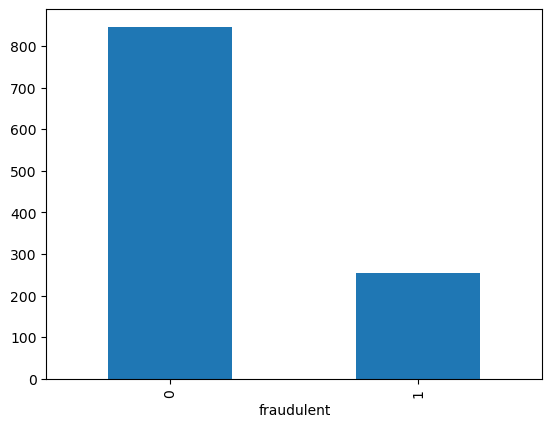

In [100]:
claims_1.fraudulent.value_counts().plot(kind='bar')

****So by seeing this bar chart we can say that the number of Normal Customers are more than the fraud customers.****

In [101]:
claims_1.head(10)

,incident_cause,claim_area,police_report,claim_type,fraudulent,Claim_group,total_policy_group
0,Driver error,Auto,No,Material only,0,Very Low,Low
1,Crime,Home,Unknown,Material only,0,Very Low,Low
2,Other driver error,Auto,No,Material only,1,Very Low,Low
3,Natural causes,Auto,No,Material only,0,Very Low,Low
4,Crime,Auto,No,Material only,0,Very Low,Low
5,Other driver error,Auto,No,Injury only,1,High,Low
6,Driver error,Auto,No,Material only,0,Very Low,Medium
7,Natural causes,Auto,No,Material only,0,Very Low,Low
8,Crime,Auto,Unknown,Material only,0,Very Low,Low
9,Crime,Auto,No,Material only,1,Very Low,Low


## Use one-hot encoding to convert the variables into numerical columns

In [102]:
claims_1.columns

Index(['incident_cause', 'claim_area', 'police_report', 'claim_type',
       'fraudulent', 'Claim_group', 'total_policy_group'],
      dtype='object')

In [103]:
claims_1 = pd.get_dummies(claims_1, columns = ['incident_cause', 'claim_area', 'police_report', 'claim_type','Claim_group', 'total_policy_group'], dtype = int)

In [104]:
claims_1.head(10)

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,police_report_Yes,claim_type_Injury only,claim_type_Material and injury,claim_type_Material only,Claim_group_High,Claim_group_Low,Claim_group_Medium,Claim_group_Very High,Claim_group_Very Low,total_policy_group_Low,total_policy_group_Medium,total_policy_group_high
0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
4,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
5,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
6,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
7,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
8,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
9,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0


**As we have all the categorical variable in our DataFrame so we can do One-hot Encoding and convert all the categorical variables to numerical to build the model.**

In [105]:
claims_1.shape

(1100, 22)

In [106]:
claims.shape

(1100, 11)

In [107]:
claims_1['claim_amount'] = claims['claim_amount']
claims_1['total_policy_claims'] = claims['total_policy_claims']

**Earlier we have dropped the claim_amount and total_policy_claims variables but again added because these two variable give a lot of impact to our model.**

In [108]:
claims_1.head()

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,police_report_Yes,claim_type_Injury only,claim_type_Material and injury,claim_type_Material only,Claim_group_High,Claim_group_Low,Claim_group_Medium,Claim_group_Very High,Claim_group_Very Low,total_policy_group_Low,total_policy_group_Medium,total_policy_group_high,claim_amount,total_policy_claims
0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,2980.0,1.0
1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,2980.0,3.0
2,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,3369.5,1.0
3,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1680.0,1.0
4,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,2680.0,1.0


In [109]:
claims_1.shape

(1100, 24)

In [110]:
claims_1.isna().sum()

fraudulent                           0
incident_cause_Crime                 0
incident_cause_Driver error          0
incident_cause_Natural causes        0
incident_cause_Other causes          0
incident_cause_Other driver error    0
claim_area_Auto                      0
claim_area_Home                      0
police_report_No                     0
police_report_Unknown                0
police_report_Yes                    0
claim_type_Injury only               0
claim_type_Material and injury       0
claim_type_Material only             0
Claim_group_High                     0
Claim_group_Low                      0
Claim_group_Medium                   0
Claim_group_Very High                0
Claim_group_Very Low                 0
total_policy_group_Low               0
total_policy_group_Medium            0
total_policy_group_high              0
claim_amount                         0
total_policy_claims                  0
dtype: int64

## Outlier Treatment

<Axes: >

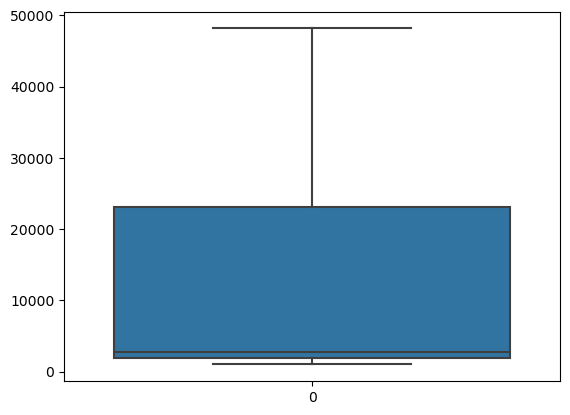

In [111]:
sns.boxplot(claims_1.claim_amount)

<Axes: >

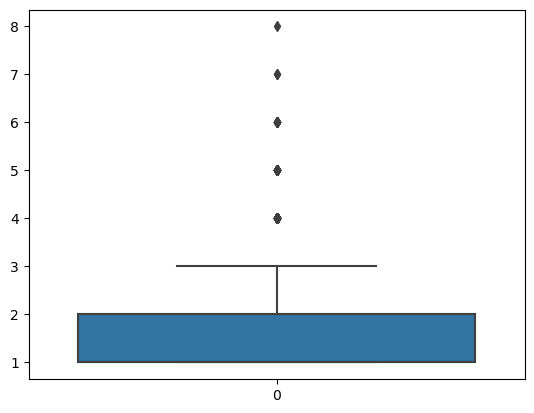

In [112]:
sns.boxplot(claims_1.total_policy_claims)

In [113]:
claims_3 = claims_1.copy()

In [114]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [115]:
claims_3.apply(outliertreat_IQR)

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,police_report_Yes,claim_type_Injury only,claim_type_Material and injury,claim_type_Material only,Claim_group_High,Claim_group_Low,Claim_group_Medium,Claim_group_Very High,Claim_group_Very Low,total_policy_group_Low,total_policy_group_Medium,total_policy_group_high,claim_amount,total_policy_claims
0,0.0,0.0,0.0,0.0,-1.5,0.0,1.0,0.0,-1.5,-1.5,0.0,0.0,0.0,-1.5,0.0,0.0,0.0,0.0,-1.5,1.0,0.0,0.0,-29711.25,-0.5
1,0.0,0.0,0.0,0.0,2.5,0.0,1.0,0.0,2.5,2.5,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,2.5,1.0,0.0,0.0,54686.75,3.5


In [116]:
claims_3['total_policy_claims'] = claims_3['total_policy_claims'].clip(lower = -0.5, upper = 3.5)

In [117]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,claims_binned
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]"
1,33985796,75740424,Crime,10-03-2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]"
2,53522022,30308357,Other driver error,02-02-2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]"
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]"
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]"


In [118]:
pd.set_option('display.max_columns',None)

In [119]:
claims_3.head()

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,police_report_Yes,claim_type_Injury only,claim_type_Material and injury,claim_type_Material only,Claim_group_High,Claim_group_Low,Claim_group_Medium,Claim_group_Very High,Claim_group_Very Low,total_policy_group_Low,total_policy_group_Medium,total_policy_group_high,claim_amount,total_policy_claims
0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,2980.0,1.0
1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,2980.0,3.0
2,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,3369.5,1.0
3,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1680.0,1.0
4,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,2680.0,1.0


## Split Train Test Data

In [51]:
X = claims_1.drop(['fraudulent'], axis=1)  #X = claims_1.drop(['fraudulent'],axis=1)

y = claims_1['fraudulent']                 #y = Claims_1['fraudulent']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [53]:
X_train.shape, X_test.shape

((880, 23), (220, 23))

In [54]:
X_train.columns

Index(['incident_cause_Crime', 'incident_cause_Driver error',
       'incident_cause_Natural causes', 'incident_cause_Other causes',
       'incident_cause_Other driver error', 'claim_area_Auto',
       'claim_area_Home', 'police_report_No', 'police_report_Unknown',
       'police_report_Yes', 'claim_type_Injury only',
       'claim_type_Material and injury', 'claim_type_Material only',
       'Claim_group_High', 'Claim_group_Low', 'Claim_group_Medium',
       'Claim_group_Very High', 'Claim_group_Very Low',
       'total_policy_group_Low', 'total_policy_group_Medium',
       'total_policy_group_high', 'claim_amount', 'total_policy_claims'],
      dtype='object')

In [55]:
X_train.head()

,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,police_report_Yes,claim_type_Injury only,claim_type_Material and injury,claim_type_Material only,Claim_group_High,Claim_group_Low,Claim_group_Medium,Claim_group_Very High,Claim_group_Very Low,total_policy_group_Low,total_policy_group_Medium,total_policy_group_high,claim_amount,total_policy_claims
900,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1680.0,1.0
895,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,30340.0,1.0
465,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,25580.0,1.0
422,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,39280.0,3.0
200,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,40660.0,1.0


In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 900 to 684
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   incident_cause_Crime               880 non-null    int32  
 1   incident_cause_Driver error        880 non-null    int32  
 2   incident_cause_Natural causes      880 non-null    int32  
 3   incident_cause_Other causes        880 non-null    int32  
 4   incident_cause_Other driver error  880 non-null    int32  
 5   claim_area_Auto                    880 non-null    int32  
 6   claim_area_Home                    880 non-null    int32  
 7   police_report_No                   880 non-null    int32  
 8   police_report_Unknown              880 non-null    int32  
 9   police_report_Yes                  880 non-null    int32  
 10  claim_type_Injury only             880 non-null    int32  
 11  claim_type_Material and injury     880 non-null    int32  
 1

# Building a Naive Bayes Model:

In [57]:
from sklearn.naive_bayes import GaussianNB  #Gaussian distribution Normal distribution,so you don't have to do any transformation to achieve normal distribution , it is done automatically by the GaussianNB().
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [58]:
y_train_pred = gnb.predict(X_train)
y_train_pred = pd.Series(y_train_pred)
Model_data_train = pd.DataFrame(y_train)
Model_data_train['y_pred'] = y_train_pred
Model_data_train

,fraudulent,y_pred
900,0,NaN
895,0,NaN
465,0,0.0
422,0,0.0
200,0,0.0
...,...,...
1033,0,NaN
763,0,0.0
835,0,0.0
559,0,0.0


**Predicting the y value for the training dataset.**

In [59]:
pd.crosstab(Model_data_train.fraudulent,Model_data_train.y_pred, margins = True)

y_pred,0.0,1.0,All
fraudulent,,,
0,502,53,555
1,148,16,164
All,650,69,719


In [60]:
from sklearn.metrics import confusion_matrix

data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])


data_table.shape

Confusion matrix

 [[636  43]
 [165  36]]

True Positives(TP) =  636

True Negatives(TN) =  36

False Positives(FP) =  43

False Negatives(FN) =  165


(2, 2)

<Axes: >

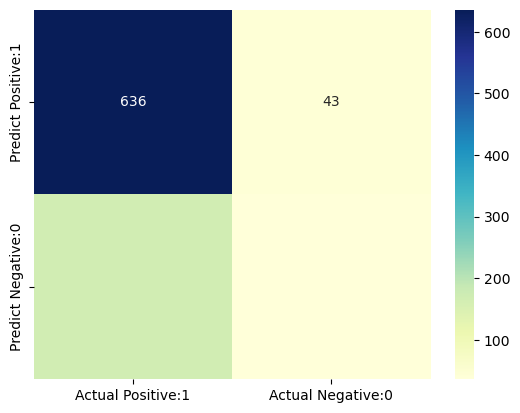

In [61]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       679
           1       0.46      0.18      0.26       201

    accuracy                           0.76       880
   macro avg       0.62      0.56      0.56       880
weighted avg       0.72      0.76      0.72       880



In [63]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score: 0.7636


## Evaluate the model on the test data

In [64]:
y_test_pred = gnb.predict(X_test)
y_test_pred = pd.Series(y_test_pred)
Model_data_test = pd.DataFrame(y_test)
Model_data_test['y_pred'] = y_test_pred
Model_data_test

,fraudulent,y_pred
395,1,NaN
860,0,NaN
477,0,NaN
671,0,NaN
1002,0,NaN
...,...,...
640,0,NaN
605,0,NaN
588,0,NaN
561,1,NaN


In [65]:
pd.crosstab(Model_data_test.fraudulent,Model_data_test.y_pred, margins = True)

y_pred,0.0,1.0,All
fraudulent,,,
0,24,1,25
1,6,2,8
All,30,3,33


In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       167
           1       0.50      0.23      0.31        53

    accuracy                           0.76       220
   macro avg       0.65      0.58      0.58       220
weighted avg       0.72      0.76      0.72       220



In [67]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))

Model accuracy score: 0.7591


In [68]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score: 0.7636


In [ ]:
#it is nt overfitting model, we have divided the training and testing dataset in 80-20 ratio and we got almost similar training and testing accuracy.